In [1]:
import auxiliary as aux
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
aux.data.head()

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
row_id,,,,,,,,,,,,,,,,,,,,,
0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,-0.500665,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,-0.363425,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,0.595777,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,-2.217847,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,-1.143500,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [3]:
# check for NaN in colunms
for n, df in enumerate(aux.subset[1:], 1):
    nan_cols = df.columns[df.isna().any()]
    print(f'Columns containing NaN in subset #{n}: {nan_cols.size} / {df.columns.size}')

Columns containing NaN in subset #1: 15 / 15
Columns containing NaN in subset #2: 0 / 25
Columns containing NaN in subset #3: 25 / 25
Columns containing NaN in subset #4: 15 / 15


In [7]:
# avg. NaN ratio excluding notNA columns
nan_cols = aux.data.columns[aux.data.isna().any()]
nan_ratio = np.round((aux.data[nan_cols].isna().sum() / aux.data.shape[0]).mean(), 5)
print(f'Avg. NaN ratio (excluding notNA columns): {nan_ratio}')
print(f'Avg. NaN ratio (total): {aux.data.isna().sum().sum() / aux.data.size}')

Avg. NaN ratio (excluding notNA columns): 0.01818
Avg. NaN ratio (total): 0.0125


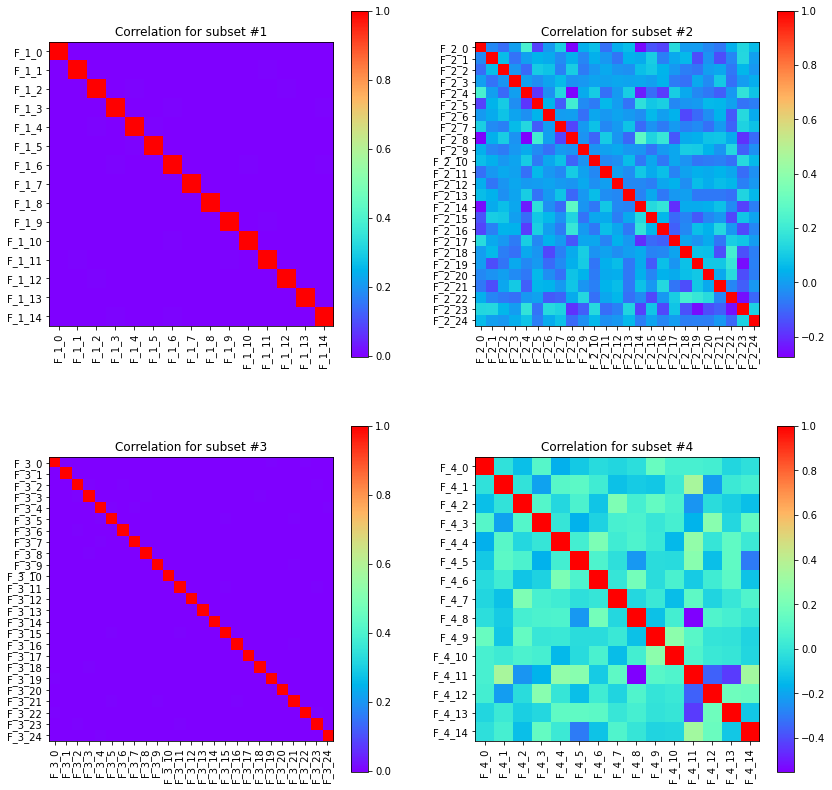

In [14]:
# correlations
fig, ax = plt.subplots(2, 2, figsize=(14, 14))

for n, df in enumerate(aux.subset[1:]):
    x, y = n // 2, n % 2
    ax[x, y].set_title(f'Correlation for subset #{n + 1}')
    im = ax[x, y].imshow(df.corr(), cmap='rainbow')
    plt.colorbar(im, ax=ax[x, y])
    ax[x, y].set_yticks(ticks=range(df.shape[1]), labels=df.columns)
    ax[x, y].set_xticks(ticks=range(df.shape[1]), labels=df.columns, rotation=90)


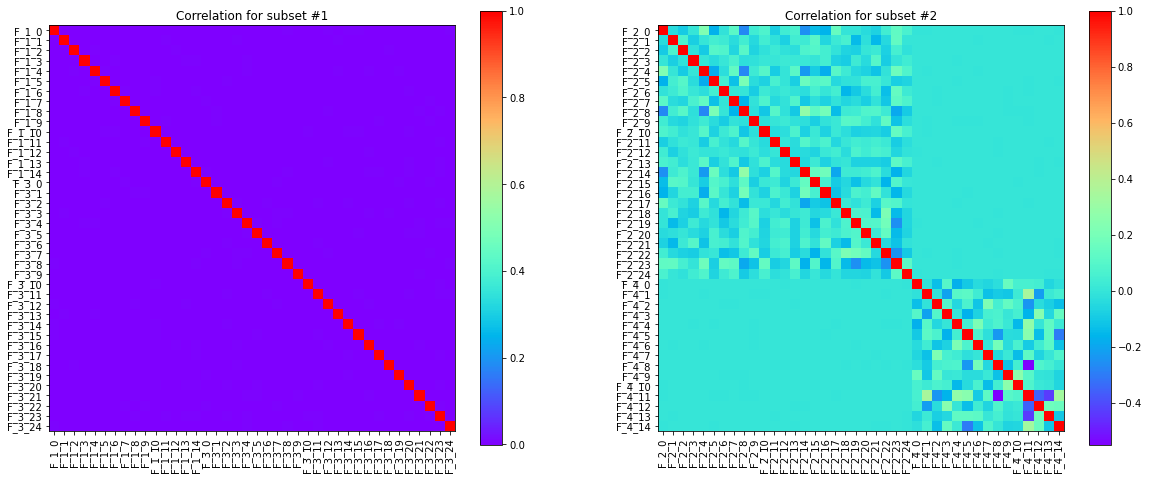

In [20]:
# mixed correlations
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# for n, (df1, df2) in enumerate(zip(aux.subset[1::2], aux.subset[2::2])):   # 1+2 / 3+4
for n, (df1, df2) in enumerate(zip(aux.subset[1:3], aux.subset[3:])):   # 1+3 / 2+4
# for n, (df1, df2) in enumerate(zip(aux.subset[1:3], aux.subset[:-3:-1])):   # 1+4 / 2+3
    df = pd.concat([df1, df2], axis=1)
    ax[n].set_title(f'Correlation for subset #{n + 1}')
    im = ax[n].imshow(df.corr(), cmap='rainbow')
    ax[n].set_yticks(ticks=range(df.shape[1]), labels=df.columns)
    ax[n].set_xticks(ticks=range(df.shape[1]), labels=df.columns, rotation=90)
    plt.colorbar(im, ax=ax[n])

As you can see, feature groups 2 and 4 have some linear correlation.

In [9]:
# subset 2 nunique
aux.subset[2].nunique().sort_values(ascending=False)

F_2_24    18
F_2_10    18
F_2_7     17
F_2_4     17
F_2_22    16
F_2_21    16
F_2_13    16
F_2_0     16
F_2_12    16
F_2_3     15
F_2_20    15
F_2_1     15
F_2_18    15
F_2_15    14
F_2_19    14
F_2_8     14
F_2_14    14
F_2_11    14
F_2_16    14
F_2_17    13
F_2_5     13
F_2_6     13
F_2_9     12
F_2_23    12
F_2_2     11
dtype: int64

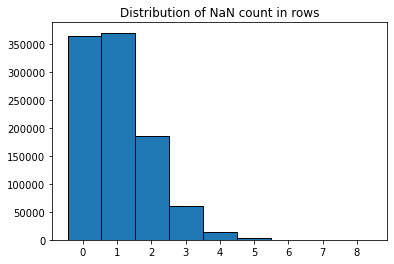

In [10]:
# how many NaN is in row?
nan_count = aux.data.isna().sum(axis=1)
plt.title('Distribution of NaN count in rows')
plt.hist(nan_count, edgecolor='black', bins=nan_count.max())

step = nan_count.max() / (nan_count.max() + 1)
plt.xticks(np.linspace(step / 2, nan_count.max() - step / 2, nan_count.max()), labels=range(nan_count.max()));

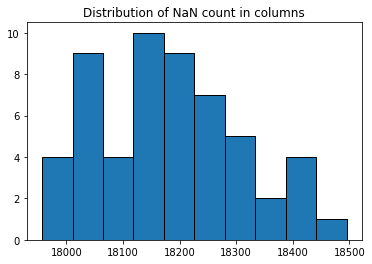

In [11]:
# how many NaN is in column?
nan_count = aux.data.isna().sum()

plt.title('Distribution of NaN count in columns')
plt.hist(nan_count[nan_count != 0], edgecolor='black');

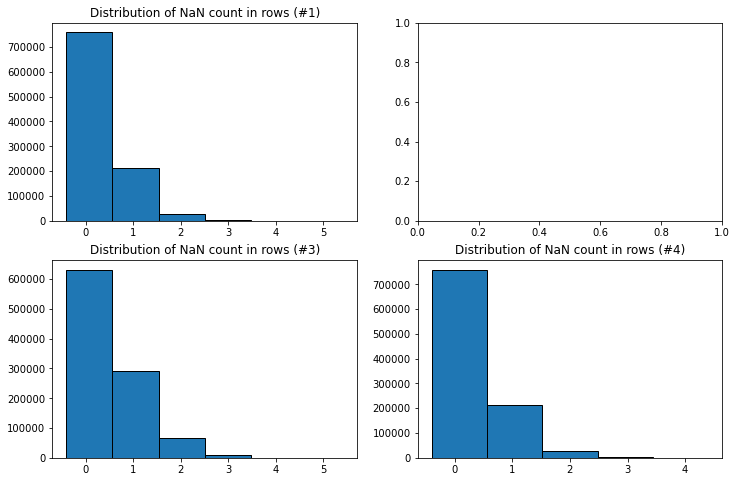

In [12]:
# rows per subsets - #2 has no NaN
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for n in range(4):
    nan_count = aux.subset[n + 1].isna().sum(axis=1)
    if nan_count.max() == 0:
        continue
    x, y = n // 2, n % 2
    ax[x, y].set_title(f'Distribution of NaN count in rows (#{n + 1})')
    ax[x, y].hist(nan_count, edgecolor='black', bins=nan_count.max())

    step = nan_count.max() / (nan_count.max() + 1)
    ax[x, y].set_xticks(np.linspace(step / 2, nan_count.max() - step / 2, nan_count.max()), labels=range(nan_count.max()));

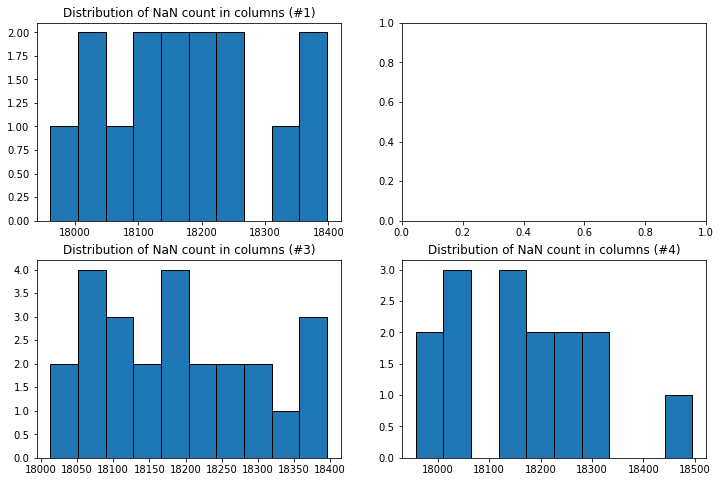

In [13]:
# cols per subsets - #2 has no NaN
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for n in range(4):
    nan_count = aux.subset[n + 1].isna().sum()
    if nan_count.max() == 0:
        continue
    x, y = n // 2, n % 2
    ax[x, y].set_title(f'Distribution of NaN count in columns (#{n + 1})')
    ax[x, y].hist(nan_count[nan_count != 0], edgecolor='black');    

In [14]:
#